# IMPORT LIBRARIES

In [1]:
import pandas as pd
from scipy import stats
import BiQ_Common_Fxns as BiQ
import pandas as pd
from scipy import stats
from tkinter import filedialog, Tk, simpledialog
import tkinter as tk
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

# PLOTS STYLE

In [2]:
# Set line color
trendline_color = 'black'

# Set line width
linewidth = 1  # Replace with your desired line width (numeric value)

# Set marker design
scatter_size = 30
scatter_edgecolor = 'black'

# Set font sizes
title_fontsize = 16
label_fontsize = 14
legend_fontsize = 14
tick_label_fontsize = 12

# EXTRACT DATA AND PERFORM TEST

Columns in Excel sheet:
Index(['X', 'Y', 'Z', 'Alpha', 'Beta'], dtype='object')
+--------------------+-----------+-----------+
| Statistic          |   Group 1 | Group 2   |
+====================+===========+===========+
| Mean               |    49.925 | 50.326    |
+--------------------+-----------+-----------+
| Standard Deviation |     9.76  | 9.989     |
+--------------------+-----------+-----------+
| SE Mean            |     0.309 | 0.316     |
+--------------------+-----------+-----------+
| 95% CI Lower       |    49.32  | 49.707    |
+--------------------+-----------+-----------+
| 95% CI Upper       |    50.53  | 50.945    |
+--------------------+-----------+-----------+
|                    |           |           |
+--------------------+-----------+-----------+
| Alpha              |     0.05  |           |
+--------------------+-----------+-----------+
| t-statistic        |    -0.892 |           |
+--------------------+-----------+-----------+
| p-value            |     

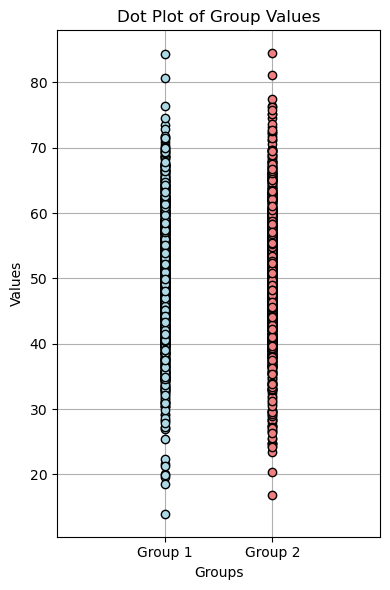

In [3]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from tkinter import filedialog, Tk, OptionMenu, Button, StringVar, Label

def read_excel_file(file_path):
    """Reads an Excel file and returns a DataFrame."""
    try:
        df = pd.read_excel(file_path)  # Read Excel file into a temporary DataFrame
        df = df.dropna(axis=1, how='all')  # Drop columns that are entirely blank
        return df  # Return the DataFrame
    except Exception as e:
        print(f"Error reading Excel file: {e}")  # Print error message if file reading fails
        return None  # Return None if an error occurs

def calculate_stats(data):
    """Calculates mean, std dev, SE, and confidence interval."""
    try:
        mean = np.mean(data)
        std_dev = np.std(data, ddof=1)  # Use ddof=1 for sample std dev
        se = std_dev / np.sqrt(len(data))
        # Calculate 95% confidence interval
        margin_error = 1.96 * se  # 1.96 for 95% CI
        conf_interval = (mean - margin_error, mean + margin_error)
        return mean, std_dev, se, conf_interval
    except Exception as e:
        print(f"Error calculating statistics: {e}")
        return None, None, None, None

def perform_paired_t_test(data, col_name1, col_name2):
    """Performs a paired t-test and prints statistical results."""
    try:
        group1 = data[col_name1]
        group2 = data[col_name2]

        # Perform paired t-test
        t_stat, p_value = stats.ttest_rel(group1, group2)

        # Prepare data for the table
        table_data = [
            ["Statistic", "Group 1", "Group 2"],
            ["Mean", f"{np.mean(group1):.3f}", f"{np.mean(group2):.3f}"],
            ["Standard Deviation", f"{np.std(group1, ddof=1):.3f}", f"{np.std(group2, ddof=1):.3f}"],
            ["SE Mean", f"{np.std(group1, ddof=1) / np.sqrt(len(group1)):.3f}", f"{np.std(group2, ddof=1) / np.sqrt(len(group2)):.3f}"],
            ["95% CI Lower", f"{np.mean(group1) - 1.96 * np.std(group1, ddof=1) / np.sqrt(len(group1)):.3f}", f"{np.mean(group2) - 1.96 * np.std(group2, ddof=1) / np.sqrt(len(group2)):.3f}"],
            ["95% CI Upper", f"{np.mean(group1) + 1.96 * np.std(group1, ddof=1) / np.sqrt(len(group1)):.3f}", f"{np.mean(group2) + 1.96 * np.std(group2, ddof=1) / np.sqrt(len(group2)):.3f}"],
            [],  # Blank row
            ["Alpha", "0.05", ""],  # Alpha value row
            ["t-statistic", f"{t_stat:.3f}", ""],
            ["p-value", f"{p_value:.3f}", ""],
        ]

        # Print the table with borders
        print(tabulate(table_data, headers="firstrow", tablefmt="grid"))

        # Interpret the results
        if p_value < 0.05:
            print("Reject the null hypothesis: There is a significant difference between the groups.")
        else:
            print("Fail to reject the null hypothesis: There is no significant difference between the groups.")

        # Plotting dot plot with light blue and light red markers
        plt.figure(figsize=(4, 6))
        plt.plot([1] * len(group1), group1, 'bo', label='Group 1', markeredgewidth=1, markeredgecolor='black', markerfacecolor='lightblue')
        plt.plot([2] * len(group2), group2, 'ro', label='Group 2', markeredgewidth=1, markeredgecolor='black', markerfacecolor='lightcoral')
        plt.xlim(0.0, 3)
        plt.xticks([1, 2], ['Group 1', 'Group 2'])
        plt.xlabel('Groups')
        plt.ylabel('Values')
        plt.title('Dot Plot of Group Values')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error performing paired t-test and plotting dot plots: {e}")

def main():
    # Open a file dialog to select Excel file
    root = Tk()
    root.withdraw()  # Hide the main window
    file_path = filedialog.askopenfilename(filetypes=[("Excel files", "*.xlsx"), ("All files", "*.*")])
    if not file_path:
        print("No file selected.")
        return

    # Read Excel file into DataFrame
    df = read_excel_file(file_path)
    if df is None:
        print("Error reading Excel file.")
        return

    print("Columns in Excel sheet:")
    print(df.columns)  # Display column names

    # Create a new popup window for column selection
    popup = Tk()
    popup.title("Select Columns")
    popup.geometry("300x150")

    # Create labels and StringVars for column selection
    lbl1 = Label(popup, text="Select Column 1:")
    lbl1.pack()
    col1_var = StringVar(popup)
    col1_var.set(df.columns[0])  # Set default value
    dropdown1 = OptionMenu(popup, col1_var, *df.columns)
    dropdown1.pack()

    lbl2 = Label(popup, text="Select Column 2:")
    lbl2.pack()
    col2_var = StringVar(popup)
    col2_var.set(df.columns[1])  # Set default value
    dropdown2 = OptionMenu(popup, col2_var, *df.columns)
    dropdown2.pack()

    def on_ok():
        col_name1 = col1_var.get()
        col_name2 = col2_var.get()
        popup.destroy()  # Close the popup window
        if col_name1 != col_name2:
            # Perform paired t-test and plot dot plot
            perform_paired_t_test(df, col_name1, col_name2)
            root.quit()  # Close the main Tkinter window after analysis
        else:
            print("Error: Please select different columns for Column 1 and Column 2.")

    # Add an OK button to trigger the analysis
    ok_button = Button(popup, text="OK", command=on_ok)
    ok_button.pack()

    popup.mainloop()

if __name__ == "__main__":
    main()
